In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

%matplotlib inline

## Data Generation
### Data Definition 
- X contains 200 data with two features
- y contains target data with two classes [0, 1]

In [2]:
X, y = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, n_samples= 200,
                           random_state = 1, n_clusters_per_class = 1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
X = StandardScaler().fit_transform(X)

In [3]:
print("The Shape of X: {}".format(X.shape))
print(X)
print("The Shape of y: {}".format(y.shape))
print(y)

The Shape of X: (200, 2)
[[-3.71390648e-01 -1.80981212e-01]
 [ 2.59630166e-01 -1.12866242e-01]
 [ 7.62997693e-01 -8.75039493e-01]
 [-1.52101133e+00 -5.64444896e-01]
 [ 6.04049615e-01 -1.47637558e+00]
 [ 1.60738370e-01 -1.46971594e-01]
 [-1.45302974e+00  6.56982936e-01]
 [-4.35694487e-01  4.93798526e-01]
 [ 5.79547881e-01 -1.86425268e+00]
 [-5.94385839e-01  3.47138458e-01]
 [-2.20827293e+00 -3.36666271e+00]
 [-1.05870818e+00 -1.41727034e+00]
 [-1.48300801e+00 -1.19700787e+00]
 [-6.02433478e-01 -1.06047100e+00]
 [-8.56665455e-01 -2.20507355e-02]
 [-3.79947240e-01 -1.36998988e+00]
 [ 7.76715005e-01  7.70073767e-01]
 [-6.31466782e-01 -1.44072702e+00]
 [ 2.45033466e+00  7.38799683e-02]
 [-1.84720756e+00  7.74327986e-01]
 [-7.65664729e-02 -1.11175599e+00]
 [ 1.12621946e+00 -7.47291045e-01]
 [-3.87478418e-01 -7.29013901e-02]
 [-1.80385059e+00 -5.22658384e-01]
 [-3.82653888e-01  1.41894348e+00]
 [-3.10681744e-01 -1.99365237e+00]
 [-8.48239706e-01  5.03917737e-01]
 [-1.65987051e+00 -2.28248202e

### Data Visualization

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap

Text(0, 0.5, 'x2')

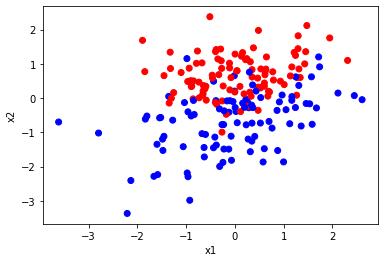

In [5]:
# Define a colormap of plot
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# ploting scatter 
plt.scatter(X[:,0], X[:, 1], c = y, cmap = cm_bright)
plt.xlabel("x1")
plt.ylabel("x2")

## SVM with Linear Kernel
### Data Splitting

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
# Split dataset into training set and test set.  80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [98]:
print("The shape of X_train: {}".format(X_train.shape))
print("The shape of X_test: {}".format(X_test.shape))

The shape of X_train: (160, 2)
The shape of X_test: (40, 2)



### Generating Model

In [99]:
#Import svm model
from sklearn import svm

In [104]:
#Create a svm Classifier with Linear Kernel
clf = svm.SVC(kernel='linear') 
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating the Model

In [105]:
## Import scikit-learn metrics module for accuracy, precision and recall calculation
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [106]:
print("Accuracy : {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision : {:.2f}".format(precision_score(y_test, y_pred)))
print("Recall : {:.2f}".format(recall_score(y_test, y_pred)))

Accuracy : 0.85
Precision : 0.92
Recall : 0.85


### Model Visualization with Linear Kernel

In [44]:
# using mlxtend to plot the decision regions.
from mlxtend.plotting import plot_decision_regions

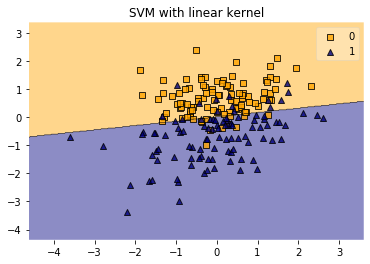

In [45]:
## plot the decision regions by using Xand y.
plot_decision_regions(X, y, clf = clf, colors = 'orange,navy')
plt.title("SVM with linear kernel")
plt.show()

## SVM with Radial Basis Function(rbf) Kernel

In [65]:
#Create a svm Classifier with rbf Kernel
clf = svm.SVC(kernel='rbf') 
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [66]:
print("Accuracy : {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision : {:.2f}".format(precision_score(y_test, y_pred)))
print("Recall : {:.2f}".format(recall_score(y_test, y_pred)))

Accuracy : 0.80
Precision : 0.88
Recall : 0.81


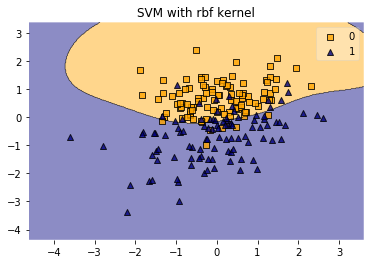

In [67]:
## plot the decision regions by using X and y.
plot_decision_regions(X, y, clf = clf, colors = 'orange,navy')
plt.title("SVM with rbf kernel")
plt.show()

## Tuning Hyperparameters
### Regularization : C. C is a penalty parameter. Default is 1

In [116]:
# define 3 different C parameter
C_list = [0.1, 1., 10.]

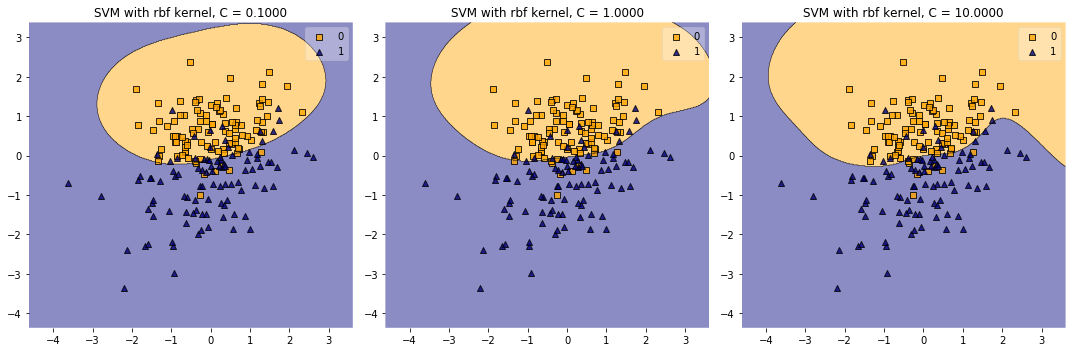

In [117]:
## Take a look at dicision regions for these three different C.
## Using rbf kenerl.
plt.figure(figsize = (15, 5))
for i, C in enumerate(C_list):
    clf = svm.SVC(kernel="rbf", C=C)
    clf.fit(X, y)
    plt.subplot(1, len(C_list), i + 1)
    plot_decision_regions(X, y, clf = clf, colors = 'orange,navy')
    plt.title("SVM with rbf kernel, C = {:.4f}".format(C))
plt.tight_layout()
plt.show()

In [118]:
## Evaluation with different C parameter.
for i, C in enumerate(C_list):
    clf = svm.SVC(kernel="rbf", C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("-----> C is: {}".format(C_list[i]))
    print("Accuracy : {:.2f}".format(accuracy_score(y_test, y_pred)))
    print("Precision : {:.2f}".format(precision_score(y_test, y_pred)))
    print("Recall : {:.2f}".format(recall_score(y_test, y_pred)))

-----> C is: 0.1
Accuracy : 0.82
Precision : 0.92
Recall : 0.81
-----> C is: 1.0
Accuracy : 0.80
Precision : 0.88
Recall : 0.81
-----> C is: 10.0
Accuracy : 0.78
Precision : 0.85
Recall : 0.81


- For this kind of Data set. When C is 0.1. The result is better.

### Gamma.

In [119]:
# define 3 different gamma parameter.
gamma_list = [0.2, 2., 10.]

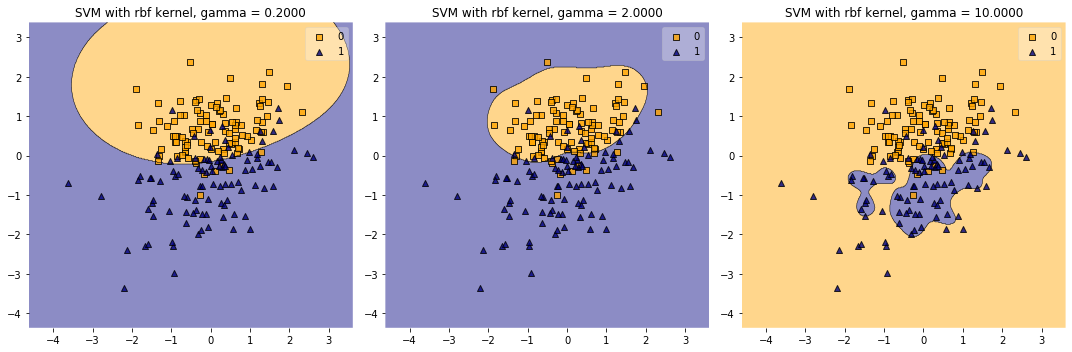

In [120]:
## Take a look at dicision regions for these three different gamma.
## Using rbf kenerl.
plt.figure(figsize = (15, 5))
for i, gamma in enumerate(gamma_list):
    clf = svm.SVC(kernel="rbf", C=0.1, gamma=gamma)
    clf.fit(X, y)
    plt.subplot(1, len(C_list), i + 1)
    plot_decision_regions(X, y, clf = clf, colors = 'orange,navy')
    plt.title("SVM with rbf kernel, gamma = {:.4f}".format(gamma))
plt.tight_layout()
plt.show()

In [121]:
## Evaluation with different gamma parameter.
for i, gamma in enumerate(gamma_list):
    clf = svm.SVC(kernel="rbf", C=0.1, gamma=gamma)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("------> gamma is: {}".format(gamma_list[i]))
    print("Accuracy : {:.2f}".format(accuracy_score(y_test, y_pred)))
    print("Precision : {:.2f}".format(precision_score(y_test, y_pred)))
    print("Recall : {:.2f}".format(recall_score(y_test, y_pred)))

------> gamma is: 0.2
Accuracy : 0.72
Precision : 0.90
Recall : 0.67
------> gamma is: 2.0
Accuracy : 0.80
Precision : 0.88
Recall : 0.81
------> gamma is: 10.0
Accuracy : 0.33
Precision : 0.00
Recall : 0.00


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- When gamma is 2.0. The result is better.

### Kernel

In [122]:
## define three different kernel
## Poly SVM is Polynomial Kernel
names = [ "Linear SVM", "rbf SVM", "Poly SVM"]

In [123]:
## generate model
models = [
            svm.SVC(kernel = "linear", C = 0.1), 
            svm.SVC(kernel = "rbf", gamma = 2, C = 0.1),
            svm.SVC(kernel = "poly", degree = 3, C = 0.1)
         ]

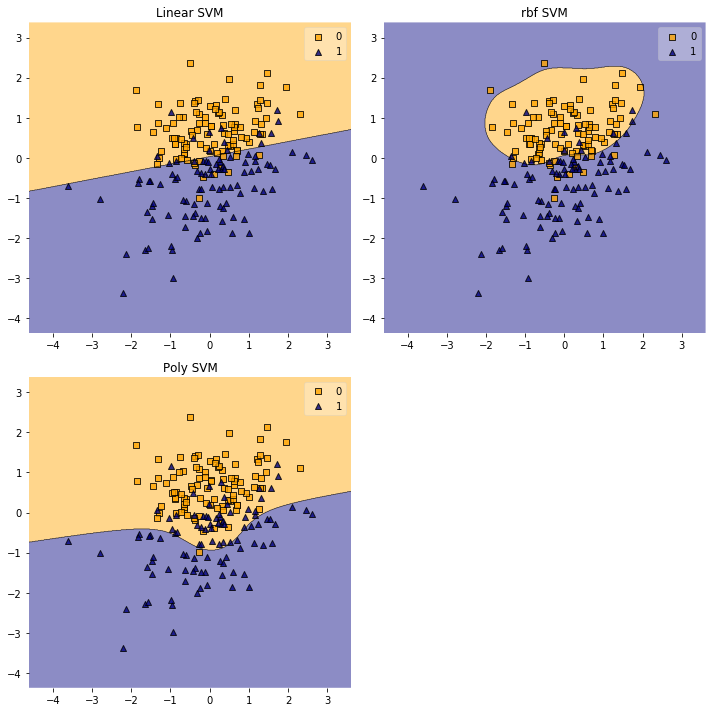

In [124]:
## Take a look at dicision regions for these three different kernel.
figure = plt.figure(figsize=(10, 10))
for i, (clf_name, clf) in enumerate(zip(names, models)):
    plt.subplot((len(models)+1)/2, 2, i + 1)
    clf.fit(X, y)
    plot_decision_regions(X, y, clf, colors = 'orange,navy')
    plt.title(clf_name, fontsize = 12)
plt.tight_layout()
plt.show()

In [125]:
## Evaluation with different kernel.
for (clf_name, clf) in zip(names, models):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("-----> Kernel is: {}".format(clf_name))
    print("Accuracy : {:.2f}".format(accuracy_score(y_test, y_pred)))
    print("Precision : {:.2f}".format(precision_score(y_test, y_pred)))
    print("Recall : {:.2f}".format(recall_score(y_test, y_pred)))

-----> Kernel is: Linear SVM
Accuracy : 0.85
Precision : 0.92
Recall : 0.85
-----> Kernel is: rbf SVM
Accuracy : 0.80
Precision : 0.88
Recall : 0.81
-----> Kernel is: Poly SVM
Accuracy : 0.68
Precision : 1.00
Recall : 0.52
